In [1]:
%pylab inline
import pandas as pd

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

Populating the interactive namespace from numpy and matplotlib


In [2]:
clusters = pd.read_csv('MOB_clustering.csv', index_col=0)

In [3]:
patterns = pd.read_csv('mob_aeh_patterns.csv', index_col=0)

In [4]:
clusters.cluster.value_counts()

6    110
0     84
2     36
8     30
Name: cluster, dtype: int64

In [5]:
cluster_patterns = ~clusters.pivot(columns='cluster')['x'].isna().add_prefix('cluster_')
cluster_patterns = cluster_patterns.loc[clusters.index]

In [6]:
patterns.corrwith(cluster_patterns.cluster_0).sort_values(ascending=False)

pattern_3    0.426346
pattern_4    0.271849
pattern_1    0.109747
pattern_0   -0.434606
pattern_2   -0.566067
dtype: float64

In [7]:
patterns.corrwith(cluster_patterns.cluster_2).sort_values(ascending=False)

pattern_4    0.475216
pattern_1    0.137119
pattern_3    0.034072
pattern_0   -0.333483
pattern_2   -0.440734
dtype: float64

In [8]:
patterns.corrwith(cluster_patterns.cluster_6).sort_values(ascending=False)

pattern_0    0.685027
pattern_2    0.623072
pattern_1   -0.143429
pattern_3   -0.273170
pattern_4   -0.562087
dtype: float64

In [9]:
patterns.corrwith(cluster_patterns.cluster_8).sort_values(ascending=False)

pattern_2    0.341541
pattern_4   -0.042459
pattern_0   -0.062639
pattern_1   -0.087082
pattern_3   -0.238478
dtype: float64

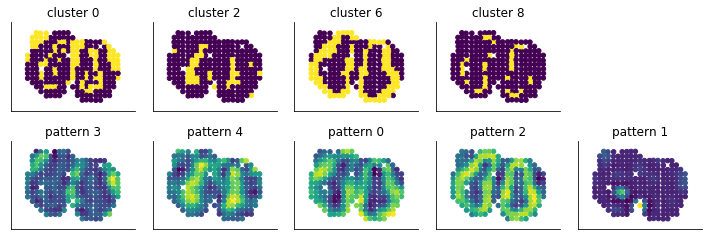

In [11]:
figsize(10, 3.445)
for i, c in enumerate(['cluster_0', 'cluster_2', 'cluster_6', 'cluster_8']):
    C = cluster_patterns[c]
    plt.subplot(2, 5, i + 1)
    plt.scatter(clusters.x, -clusters.y, c=C, s=20)
    plt.axis('equal')
    plt.title(c.replace('_', ' '))
    
    plt.xticks([])
    plt.yticks([])
    
for i, c in enumerate(['pattern_3', 'pattern_4', 'pattern_0', 'pattern_2', 'pattern_1']):
    C = patterns[c]
    plt.subplot(2, 5, 5 + i + 1)
    plt.scatter(clusters.x, -clusters.y, c=C, s=20)
    plt.axis('equal')
    plt.title(c.replace('_', ' '))
    
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
plt.savefig('MOB_aeh_clustering_comparison.pdf', bbox_inches='tight')